In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with open("images.pickle", "rb") as f:
    images = pickle.load(f)
with open("images_w_crop_pad.pickle", "rb") as f:
    images_cropped = pickle.load(f)
with open("joints.pickle", "rb") as f:
    joints = pickle.load(f)
with open("joints_scaled.pickle", "rb") as f:
    joints_scaled = pickle.load(f)
with open("bboxs.pickle", "rb") as f:
    bboxs = pickle.load(f)

In [ ]:
directory = "RovitDataset/bounding_boxes/data_1/"
bboxs = []
for i in range(708):
    for j in range(1,5):
        temp = str(i) + "_bbox_" + str(j) + ".txt"
        bboxdict = {}
        with open(directory+temp, 'r') as f:
            lines = f.read()
        lines = lines.split("\n")
        for line in lines:
            if line == '':
                continue
            line = line.split(" ")
            bboxdict[line[0]] = int(line[1])
        bboxs.append(bboxdict)

In [ ]:
directory = "RovitDataset/projections_2d/data_1/"
joints = []
for i in range(708):
    for j in range(1,5):
        temp = str(i) + "_jointsCam_" + str(j) + ".txt"
        jointdict = {}
        with open(directory+temp, 'r') as f:
            lines = f.read()
        lines = lines.split("\n")
        for line in lines:
            if line == '':
                continue
            line = line.split(" ")
            jointdict[line[0]] = [float(line[1]), float(line[2])]
        joints.append(jointdict)

In [3]:
test = True
i = 0
for joint in joints:
    for k, v in joint.items():
        if v[1] < bboxs[i]["TOP"] or v[1] > bboxs[i]["BOTTOM"]:
            test = False
        if v[0] < bboxs[i]["LEFT"] or v[0] > bboxs[i]["RIGHT"]:
            test = False
    i += 1
if test == True:
    print("All points are inside bounding boxes")

All points are inside bounding boxes


In [4]:
maxw = 0
maxh = 0
for bbox in bboxs:
    if bbox["BOTTOM"] - bbox["TOP"] > maxh:
        maxh = bbox["BOTTOM"] - bbox["TOP"]
    if bbox["RIGHT"] - bbox["LEFT"] > maxw:
        maxw = bbox["RIGHT"] - bbox["LEFT"]
print("Max Height of Bounding Boxes:{}\nMax Width of Bounding Boxes:{}".format(maxh,maxw))

Max Height of Bounding Boxes:275
Max Width of Bounding Boxes:306


In [5]:
# Shallow Copy of joints list
joints_scaled = []
for joint in joints:
    temp = {}
    for k,v in joint.items():
        temp[k] = v
    joints_scaled.append(temp)

In [6]:
images_cropped = np.zeros(shape=(len(images), maxh, maxw, 3),
                            dtype=np.uint8)
for i in range(len(images)):
    # Crop Image
    cropped = images[i][bboxs[i]["TOP"]:bboxs[i]["BOTTOM"], bboxs[i]["LEFT"]:bboxs[i]["RIGHT"]]
    shape = cropped.shape
    
    # Calculating margins
    tm = (maxh - shape[0])//2 if (maxh - shape[0]) % 2==0 else (maxh - shape[0])//2 + 1
    bm = (maxh - shape[0])//2
    lm = (maxw - shape[1])//2 if (maxw - shape[1]) % 2==0 else (maxw - shape[1])//2 + 1
    rm = (maxw - shape[1])//2
    
    # Adjusting joints
    for k, v in joints_scaled[i].items():
        joints_scaled[i][k][0] = joints_scaled[i][k][0] - bboxs[i]["LEFT"] + lm
        joints_scaled[i][k][1] = joints_scaled[i][k][1] - bboxs[i]["TOP"] + tm
    
    images_cropped[i][tm:shape[0]+tm, lm:shape[1]+lm] = cropped

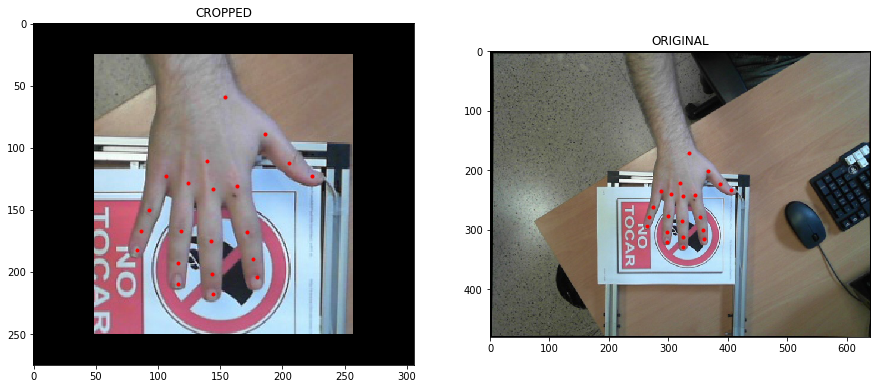

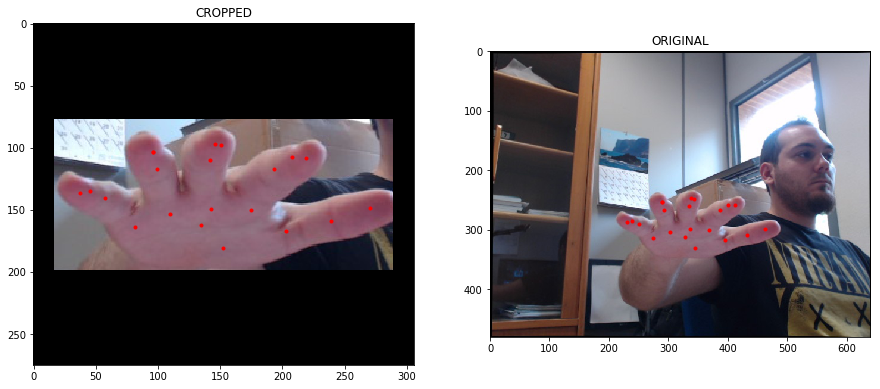

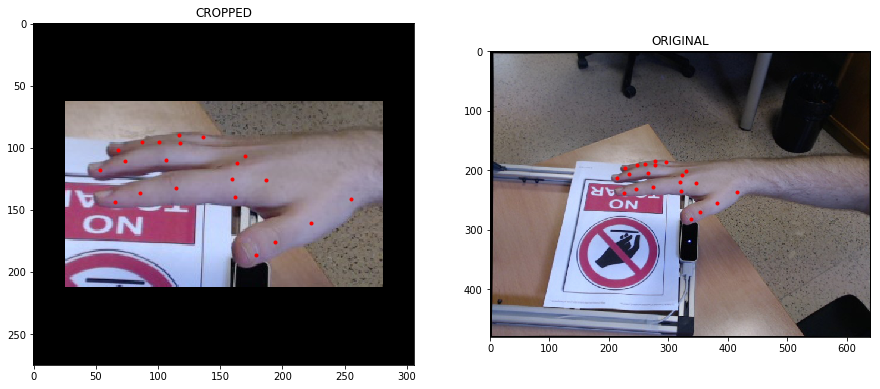

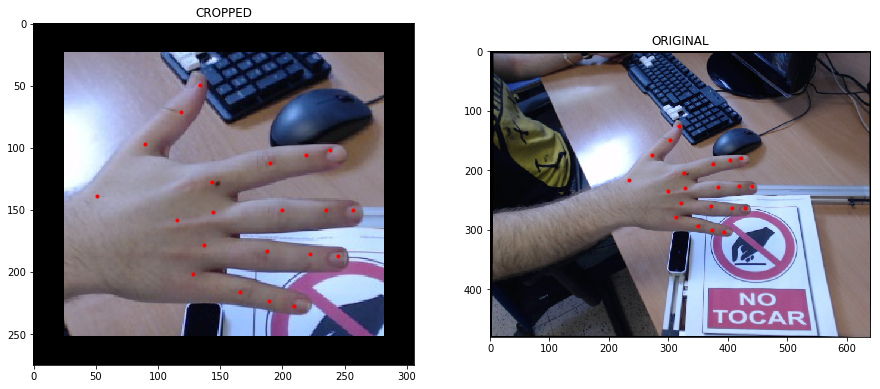

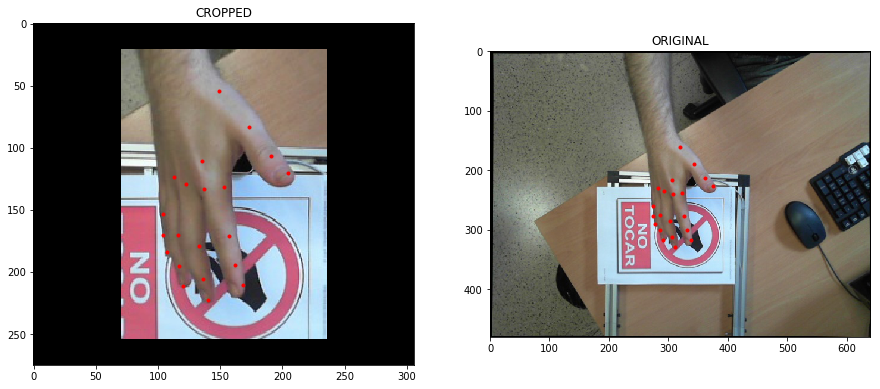

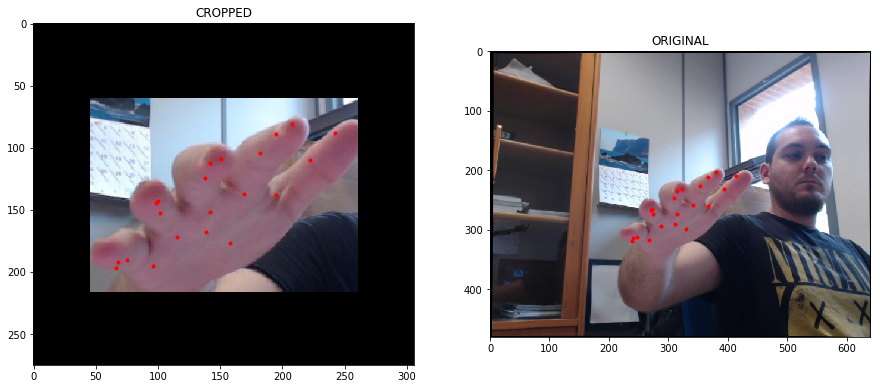

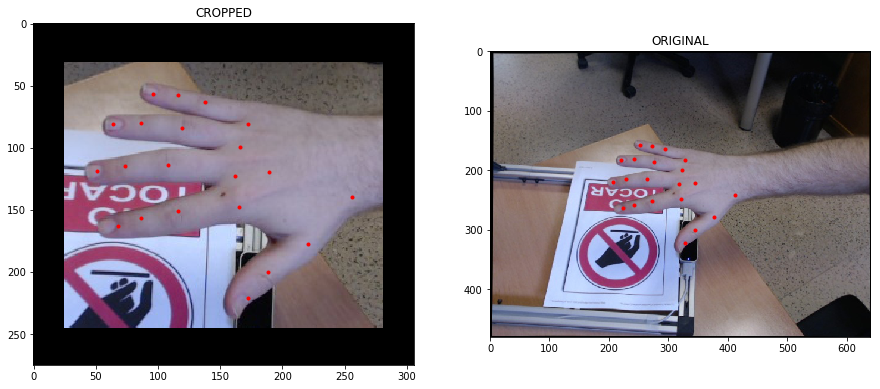

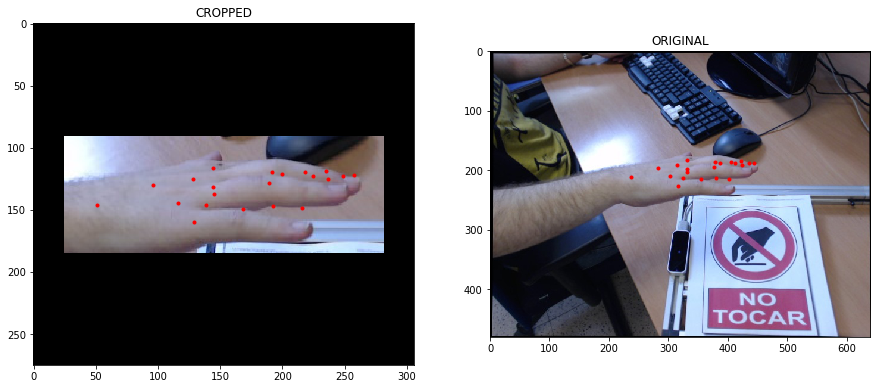

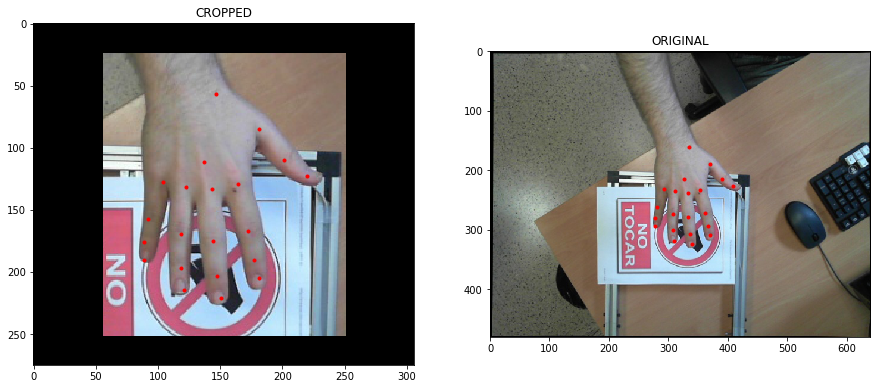

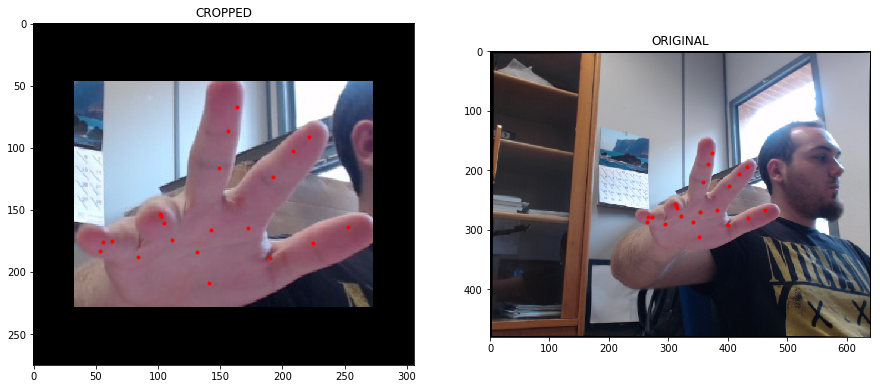

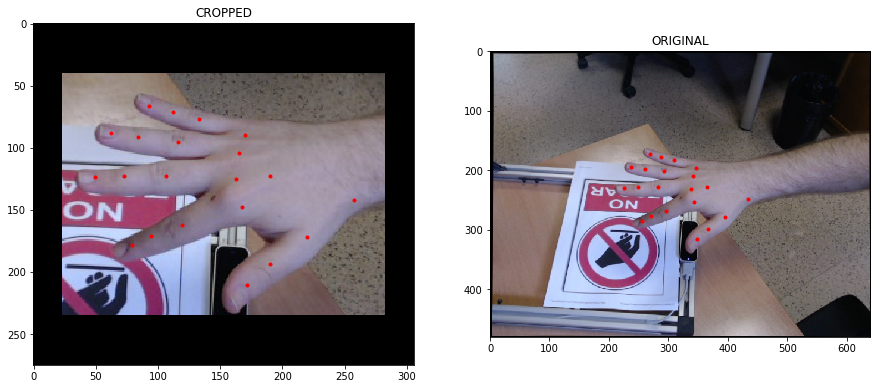

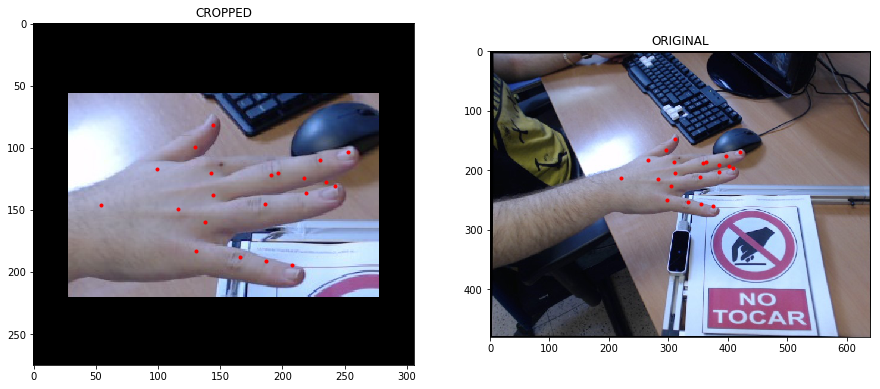

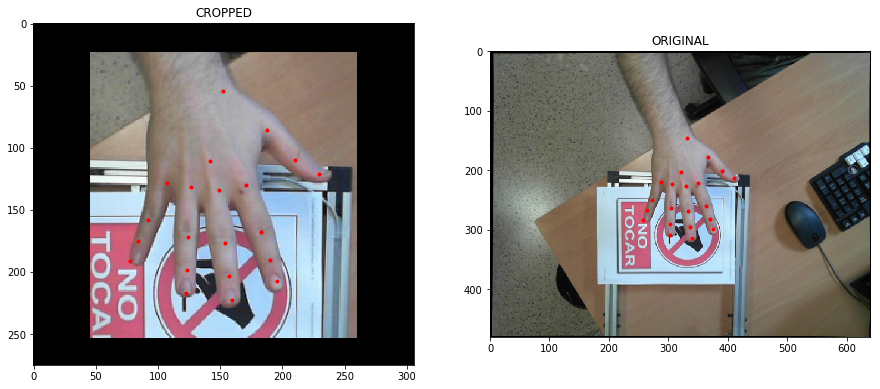

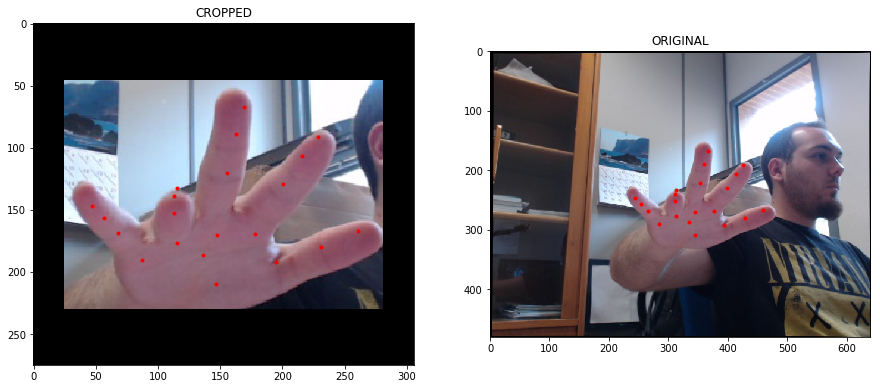

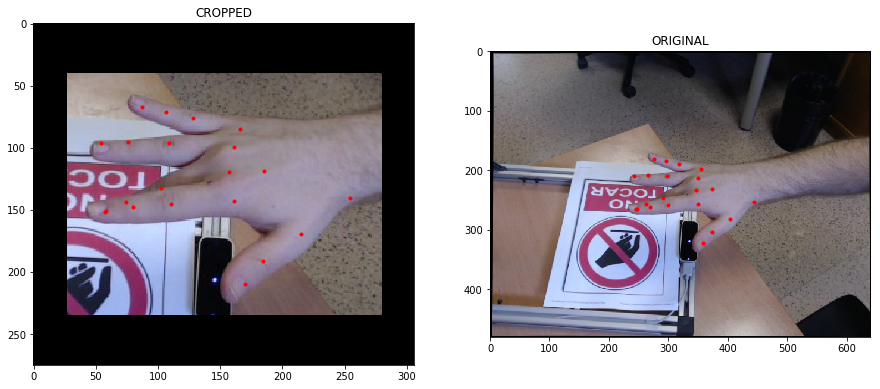

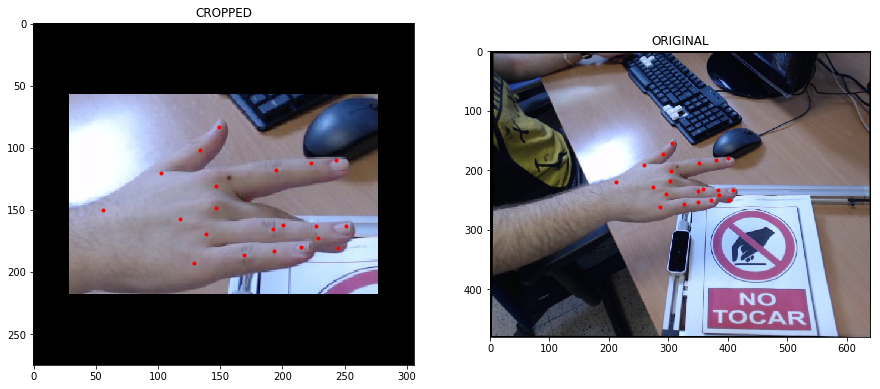

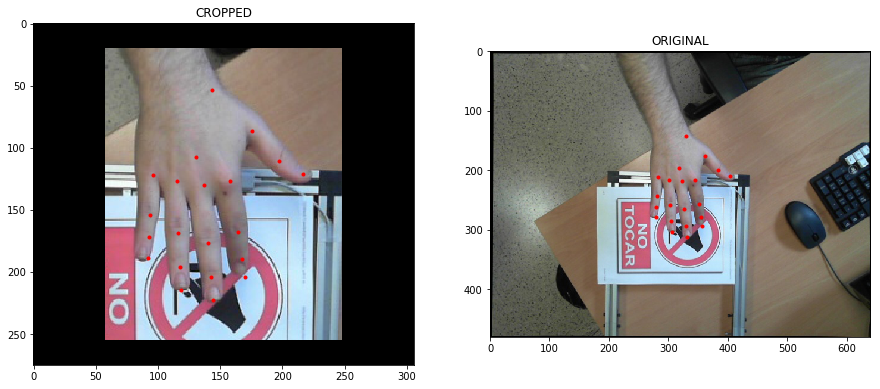

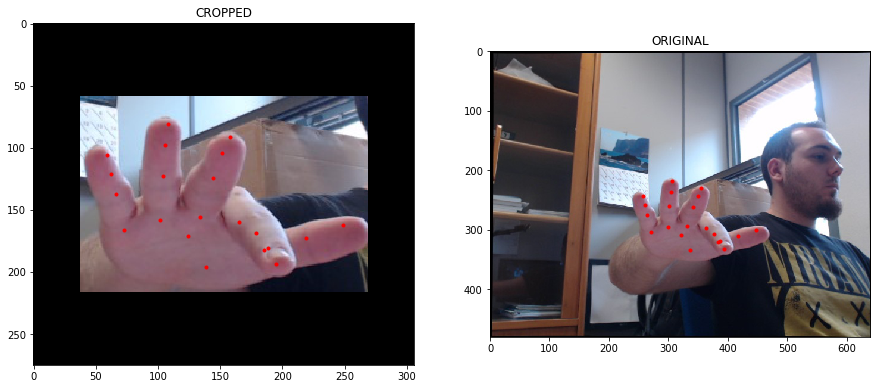

In [8]:
for i in range(10,100, 5):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
    ax1.imshow(images_cropped[i])
    for k, v in joints_scaled[i].items():
        ax1.plot(v[0], v[1], '.', color="red")
    ax1.set_title("CROPPED")
        
    ax2.imshow(images[i])
    for k, v in joints[i].items():
        ax2.plot(v[0], v[1], '.', color="red")
    ax2.set_title("ORIGINAL")